1. **Run in a Jupyter Notebook:**
   - The interactive widgets require an environment that supports `ipywidgets`.
   - Ensure you have `ipywidgets` installed:
     ```bash
     pip install ipywidgets
     ```
     And enable widgets extensions:
     ```bash
     jupyter nbextension enable --py widgetsnbextension
     ```

2. **Interactive Controls:**
   - **Shape Types:** Use the `SelectMultiple` widget to choose one or more shapes ('Circle', 'Square', 'Triangle').
   - **Plane Area (`A_plane`):** Adjust the total area of the plane to be filled.
   - **Initial Area (`A0`):** Set the area of the initial shape.
   - **Exponent (`p`):** Modify the exponent in the decreasing function \( g(i) \).
   - **Number of Shapes (`n_shapes`):** Set the maximum number of shapes to attempt to place.
   - **Max Particle Size (`max_particle_size`):** Specify the maximum size for the shapes.
   - **Random Orientation (`random_orientation`):** Toggle random rotations for squares and triangles.

3. **Dynamic Updates:**
   - Adjust the controls to see the tiling update in real-time.
   - Observe how changing parameters affects the placement, size, and types of shapes.

### Explanation of the New Features

#### 1. Multiple Shape Types

- **Implementation:**
  - Changed `shape_type` to `shape_types`, which is a list of selected shape types.
  - Used a `SelectMultiple` widget to allow multiple selections.
  - When assigning areas to shapes, the code randomly selects a shape type from the chosen list for each shape.

- **Purpose:**
  - Allows you to include a mix of shapes in the tiling.
  - Adds diversity and complexity to the patterns generated.

#### 2. Random Shape Selection

- **Assignment of Areas:**
  - The areas calculated are shuffled to distribute different sizes among the shapes.
  - For each area, a shape type is randomly selected from the chosen list.

- **Placement and Drawing:**
  - The code handles the drawing of each shape according to its type.
  - Overlap checking is adjusted to account for different shape types.

#### 3. Overlap Checking Adjustments

- **Mixed Shapes:**
  - The `is_overlapping` function is updated to handle different shape types.
  - Shapes are approximated as circles for overlap checking to simplify collision detection.

- **Radius Calculation:**
  - For circles, the radius is straightforward.
  - For squares and triangles, the code calculates an equivalent radius by approximating the shape's bounding circle.

### Additional Notes

- **Shuffle Areas:**
  - Shuffling the list of areas ensures that sizes are randomly distributed among the shapes, preventing patterns where certain shapes only have large or small sizes.

- **Shape-Specific Parameters:**
  - You can further customize the properties of each shape type if needed.

- **Performance Considerations:**
  - As the complexity increases with multiple shapes, the computation time may also increase.
  - The code includes a maximum number of attempts to place each shape to prevent infinite loops.

- **Visualization:**
  - The plot title dynamically updates to reflect the selected shape types.
  - Colors and styles are set differently for each shape type to distinguish them visually.

### Example Usage

- **Selecting All Shapes:**
  - By default, all shapes are selected, resulting in a tiling that includes circles, squares, and triangles.

- **Selecting Specific Shapes:**
  - You can select only 'Circle' and 'Square' to exclude triangles.
  - Alternatively, select a single shape type to focus on that shape.

- **Adjusting Parameters:**
  - Modify the exponent `p` to see how it affects the size distribution.
  - Change the maximum particle size to limit the size of the largest shapes.
  - Toggle random orientation to see the difference between aligned and randomly rotated shapes.

**Note:** Ensure you have the necessary libraries installed (`numpy`, `matplotlib`, `scipy`, `ipywidgets`) and that you are running the code in an environment that supports interactive widgets.

---

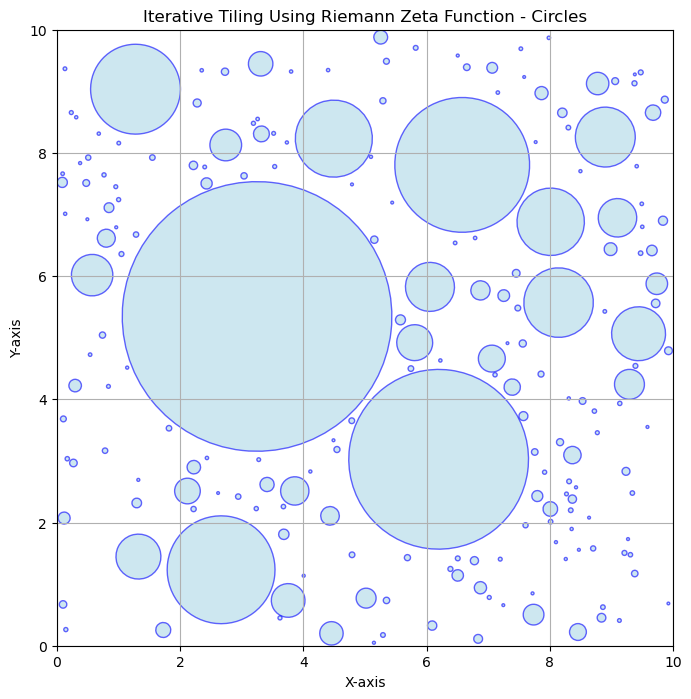

interactive(children=(Dropdown(description='Shape Type', options=('Circle', 'Square', 'Triangle'), value='Circ…

<function __main__.interactive_tiling(shape_type, A_plane, A0, p, n_shapes, max_particle_size, random_orientation)>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.special import zeta
import random
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, Checkbox

# Function to generate the tiling
def generate_tiling(
    shape_type='Circle',
    A_plane=100.0,
    A0=2,
    p=1.2,
    n_shapes=200000,
    max_particle_size=15.0,
    random_orientation=True
):
    # Calculate c using the Riemann zeta function
    zeta_p = zeta(p)
    c = A0 * zeta_p / (A_plane - A0)
    
    # Generate areas for each shape
    areas = [A0]
    i = 1
    while len(areas) < n_shapes:
        area = A0 / ((i**p) * c)
        if area <= 0 or np.sqrt(area) > max_particle_size:
            i += 1
            continue
        areas.append(area)
        i += 1

    # Compute dimensions of the shapes
    if shape_type == 'Circle':
        sizes = [np.sqrt(area / np.pi) for area in areas]  # Radii
    else:
        sizes = [np.sqrt(area) for area in areas]  # Side lengths for squares and triangles

    # Define the plane dimensions (square)
    L = np.sqrt(A_plane)  # Length of the side of the square plane

    # Initialize list to store positions and sizes of the shapes
    positions = []

    # Function to check if a new shape overlaps with existing ones
    def is_overlapping(x_new, y_new, size_new, positions):
        for x, y, size, angle in positions:
            if shape_type == 'Circle':
                distance = np.hypot(x_new - x, y_new - y)
                if distance < (size_new + size):
                    return True
            else:
                # Approximate the shapes with circles for overlap checking
                distance = np.hypot(x_new - x, y_new - y)
                radius_new = size_new * np.sqrt(2) / 2
                radius = size * np.sqrt(2) / 2
                if distance < (radius_new + radius):
                    return True
        return False

    # Place the shapes randomly without overlapping
    for size in sizes:
        max_attempts = 1000
        for attempt in range(max_attempts):
            # Generate random position within the plane, ensuring the shape stays within bounds
            x = random.uniform(size, L - size)
            y = random.uniform(size, L - size)
            angle = random.uniform(0, 360) if random_orientation else 0
            # Check for overlap
            if not is_overlapping(x, y, size, positions):
                positions.append((x, y, size, angle))
                break
        else:
            print(f"Could not place a shape of size {size} without overlap after {max_attempts} attempts.")
            break

    # Plot the shapes
    fig, ax = plt.subplots(figsize=(8, 8))
    for x, y, size, angle in positions:
        if shape_type == 'Circle':
            shape = plt.Circle((x, y), size, edgecolor='blue', facecolor='lightblue', alpha=0.6)
        elif shape_type == 'Square':
            shape = patches.Rectangle(
                (x - size / 2, y - size / 2),
                size,
                size,
                angle=angle,
                edgecolor='green',
                facecolor='lightgreen',
                alpha=0.6
            )
        elif shape_type == 'Triangle':
            # Equilateral triangle
            h = size * np.sqrt(3) / 2
            points = np.array([
                [x, y + 2 * h / 3],
                [x - size / 2, y - h / 3],
                [x + size / 2, y - h / 3]
            ])
            t = patches.Polygon(
                points,
                closed=True,
                edgecolor='red',
                facecolor='salmon',
                alpha=0.6
            )
            shape = t
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
        else:
            continue

        if shape_type in ['Circle', 'Square']:
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
            ax.add_patch(shape)
        elif shape_type == 'Triangle':
            ax.add_patch(shape)

    # Set plot parameters
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Iterative Tiling Using Riemann Zeta Function - {shape_type}s')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Interactive widget function
def interactive_tiling(
    shape_type,
    A_plane,
    A0,
    p,
    n_shapes,
    max_particle_size,
    random_orientation
):
    generate_tiling(
        shape_type=shape_type,
        A_plane=A_plane,
        A0=A0,
        p=p,
        n_shapes=n_shapes,
        max_particle_size=max_particle_size,
        random_orientation=random_orientation
    )

# Create interactive sliders and dropdowns
interact(
    interactive_tiling,
    shape_type=Dropdown(options=['Circle', 'Square', 'Triangle'], value='Circle', description='Shape Type'),
    A_plane=FloatSlider(value=100.0, min=50.0, max=500.0, step=10.0, description='Plane Area'),
    A0=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Initial Area A0'),
    p=FloatSlider(value=2.0, min=1.1, max=5.0, step=0.1, description='Exponent p'),
    n_shapes=IntSlider(value=200, min=50, max=1000, step=50, description='Number of Shapes'),
    max_particle_size=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5, description='Max Particle Size'),
    random_orientation=Checkbox(value=True, description='Random Orientation')
)


Could not place a shape of size 4.376918031368705 without overlap after 1000 attempts.


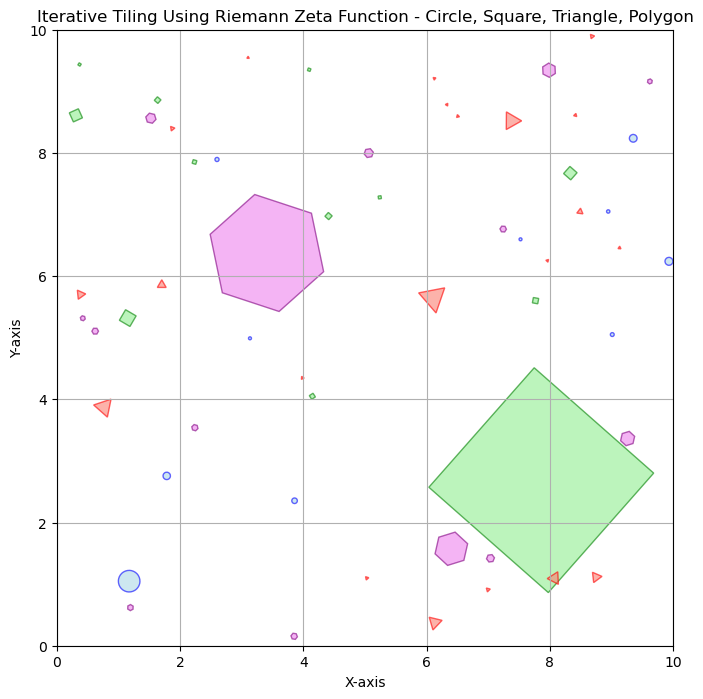

interactive(children=(SelectMultiple(description='Shape Types', index=(0, 1, 2, 3), options=('Circle', 'Square…

<function __main__.interactive_tiling(shape_types, A_plane, A0, p, n_shapes, max_particle_size, random_orientation, polygon_sides, irregularity, spikiness)>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.special import zeta
import random
from ipywidgets import interact, FloatSlider, IntSlider, SelectMultiple, Checkbox, HBox, VBox, Label

# Function to generate a random polygon
def generate_polygon(center, avg_radius, irregularity, spikiness, num_vertices):
    '''Generates the points of a random polygon.

    Parameters:
    - center: tuple (x, y)
    - avg_radius: float, average radius of the polygon
    - irregularity: float between 0 and 1, the variance of the angular spacing
    - spikiness: float between 0 and 1, the variance of the radius
    - num_vertices: int, number of vertices of the polygon

    Returns:
    - A list of (x, y) tuples representing the vertices of the polygon.
    '''
    irregularity = np.clip(irregularity, 0, 1) * 2 * np.pi / num_vertices
    spikiness = np.clip(spikiness, 0, 1) * avg_radius

    # Generate angle steps
    angle_steps = []
    lower = (2 * np.pi / num_vertices) - irregularity
    upper = (2 * np.pi / num_vertices) + irregularity
    sum = 0
    for _ in range(num_vertices):
        tmp = random.uniform(lower, upper)
        angle_steps.append(tmp)
        sum += tmp

    # Normalize the steps so that the sum is 2*pi
    k = sum / (2 * np.pi)
    for i in range(num_vertices):
        angle_steps[i] /= k

    # Generate the points
    points = []
    angle = random.uniform(0, 2 * np.pi)
    for i in range(num_vertices):
        r_i = np.clip(random.gauss(avg_radius, spikiness), 0, 2 * avg_radius)
        x = center[0] + r_i * np.cos(angle)
        y = center[1] + r_i * np.sin(angle)
        points.append((x, y))
        angle += angle_steps[i]

    return points

# Function to generate the tiling
def generate_tiling(
    shape_types=['Circle', 'Square', 'Triangle', 'Polygon'],
    A_plane=100.0,
    A0=1.0,
    p=2.0,
    n_shapes=200,
    max_particle_size=5.0,
    random_orientation=True,
    polygon_sides=6,
    irregularity=0.0,
    spikiness=0.0
):
    # Calculate c using the Riemann zeta function
    zeta_p = zeta(p)
    c = A0 * zeta_p / (A_plane - A0)
    
    # Generate areas for each shape
    areas = [A0]
    i = 1
    while len(areas) < n_shapes:
        area = A0 / ((i**p) * c)
        if area <= 0:
            break
        size = np.sqrt(area / np.pi) if 'Circle' in shape_types else np.sqrt(area)
        if size > max_particle_size:
            i += 1
            continue
        areas.append(area)
        i += 1
    
    # Shuffle the areas to distribute sizes among shapes
    random.shuffle(areas)
    
    # Assign areas to shapes
    shape_assignments = []
    sizes_list = []
    for area in areas:
        shape = random.choice(shape_types)
        if shape == 'Circle':
            size = np.sqrt(area / np.pi)  # Radius
        else:
            size = np.sqrt(area)  # Side length for squares and triangles
        sizes_list.append(size)
        shape_assignments.append(shape)
    
    # Define the plane dimensions (square)
    L = np.sqrt(A_plane)  # Length of the side of the square plane
    
    # Initialize list to store positions and sizes of the shapes
    positions = []
    
    # Function to check if a new shape overlaps with existing ones
    def is_overlapping(x_new, y_new, size_new, shape_new, positions):
        # Approximate the shape with a circle for overlap checking
        if shape_new == 'Circle':
            radius_new = size_new
        elif shape_new == 'Polygon':
            radius_new = size_new  # Approximate radius for polygons
        else:
            radius_new = size_new * np.sqrt(2) / 2  # For squares and triangles
        for x, y, size, shape, angle, params in positions:
            if shape == 'Circle':
                radius = size
            elif shape == 'Polygon':
                radius = size
            else:
                radius = size * np.sqrt(2) / 2
            distance = np.hypot(x_new - x, y_new - y)
            if distance < (radius_new + radius):
                return True
        return False
    
    # Place the shapes randomly without overlapping
    for idx, (size, shape_type) in enumerate(zip(sizes_list, shape_assignments)):
        max_attempts = 1000
        for attempt in range(max_attempts):
            # Generate random position within the plane, ensuring the shape stays within bounds
            x = random.uniform(size, L - size)
            y = random.uniform(size, L - size)
            angle = random.uniform(0, 360) if random_orientation else 0
            # Check for overlap
            if not is_overlapping(x, y, size, shape_type, positions):
                # For polygons, store additional parameters
                params = {}
                if shape_type == 'Polygon':
                    params['num_vertices'] = polygon_sides
                    params['irregularity'] = irregularity
                    params['spikiness'] = spikiness
                else:
                    params = None
                positions.append((x, y, size, shape_type, angle, params))
                break
        else:
            print(f"Could not place a shape of size {size} without overlap after {max_attempts} attempts.")
            break
    
    # Plot the shapes
    fig, ax = plt.subplots(figsize=(8, 8))
    for x, y, size, shape_type, angle, params in positions:
        if shape_type == 'Circle':
            shape = plt.Circle((x, y), size, edgecolor='blue', facecolor='lightblue', alpha=0.6)
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
            ax.add_patch(shape)
        elif shape_type == 'Square':
            shape = patches.Rectangle(
                (x - size / 2, y - size / 2),
                size,
                size,
                angle=angle,
                edgecolor='green',
                facecolor='lightgreen',
                alpha=0.6
            )
            ax.add_patch(shape)
        elif shape_type == 'Triangle':
            # Equilateral triangle
            h = size * np.sqrt(3) / 2
            points = np.array([
                [x, y + 2 * h / 3],
                [x - size / 2, y - h / 3],
                [x + size / 2, y - h / 3]
            ])
            t = patches.Polygon(
                points,
                closed=True,
                edgecolor='red',
                facecolor='salmon',
                alpha=0.6
            )
            t.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
            ax.add_patch(t)
        elif shape_type == 'Polygon':
            num_vertices = params['num_vertices']
            irregularity = params['irregularity']
            spikiness = params['spikiness']
            avg_radius = size
            points = generate_polygon(
                center=(x, y),
                avg_radius=avg_radius,
                irregularity=irregularity,
                spikiness=spikiness,
                num_vertices=num_vertices
            )
            poly = patches.Polygon(
                points,
                closed=True,
                edgecolor='purple',
                facecolor='violet',
                alpha=0.6
            )
            ax.add_patch(poly)
        else:
            continue
    
    # Set plot parameters
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect('equal', 'box')
    title_shapes = ', '.join(shape_types)
    ax.set_title(f'Iterative Tiling Using Riemann Zeta Function - {title_shapes}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    plt.grid(True)
    plt.show()
    
# Interactive widget function
def interactive_tiling(
    shape_types,
    A_plane,
    A0,
    p,
    n_shapes,
    max_particle_size,
    random_orientation,
    polygon_sides,
    irregularity,
    spikiness
):
    generate_tiling(
        shape_types=list(shape_types),
        A_plane=A_plane,
        A0=A0,
        p=p,
        n_shapes=n_shapes,
        max_particle_size=max_particle_size,
        random_orientation=random_orientation,
        polygon_sides=polygon_sides,
        irregularity=irregularity,
        spikiness=spikiness
    )

# Create interactive sliders and widgets
interact(
    interactive_tiling,
    shape_types=SelectMultiple(
        options=['Circle', 'Square', 'Triangle', 'Polygon'],
        value=['Circle', 'Square', 'Triangle', 'Polygon'],
        description='Shape Types'
    ),
    A_plane=FloatSlider(value=100.0, min=50.0, max=500.0, step=10.0, description='Plane Area'),
    A0=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Initial Area A0'),
    p=FloatSlider(value=2.0, min=1.1, max=5.0, step=0.1, description='Exponent p'),
    n_shapes=IntSlider(value=200, min=50, max=1000, step=50, description='Number of Shapes'),
    max_particle_size=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5, description='Max Particle Size'),
    random_orientation=Checkbox(value=True, description='Random Orientation'),
    polygon_sides=IntSlider(value=6, min=3, max=12, step=1, description='Polygon Sides'),
    irregularity=FloatSlider(value=0.0, min=0.0, max=1.0, step=0.05, description='Irregularity'),
    spikiness=FloatSlider(value=0.0, min=0.0, max=1.0, step=0.05, description='Spikiness')
)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.special import zeta
import random
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, Checkbox


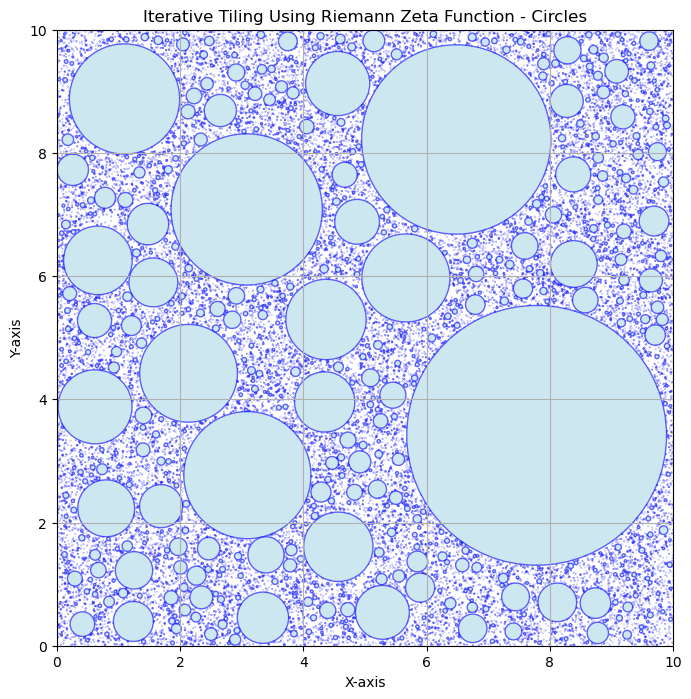

interactive(children=(Dropdown(description='Shape Type', options=('Circle', 'Square', 'Triangle'), value='Circ…

<function __main__.interactive_tiling(shape_type, A_plane, A0, p, n_shapes, max_particle_size, random_orientation)>

In [2]:

# Function to generate the tiling
def generate_tiling(
    shape_type='Circle',
    A_plane=100.0,
    A0=1.0,
    p=2.0,
    n_shapes=200,
    max_particle_size=5.0,
    random_orientation=True
):
    # Calculate c using the Riemann zeta function
    zeta_p = zeta(p)
    c = A0 * zeta_p / (A_plane - A0)
    
    # Generate areas for each shape
    areas = [A0]
    i = 1
    while len(areas) < n_shapes:
        area = A0 / ((i**p) * c)
        if area <= 0 or np.sqrt(area) > max_particle_size:
            i += 1
            continue
        areas.append(area)
        i += 1

    # Compute dimensions of the shapes
    if shape_type == 'Circle':
        sizes = [np.sqrt(area / np.pi) for area in areas]  # Radii
    else:
        sizes = [np.sqrt(area) for area in areas]  # Side lengths for squares and triangles

    # Define the plane dimensions (square)
    L = np.sqrt(A_plane)  # Length of the side of the square plane

    # Initialize list to store positions and sizes of the shapes
    positions = []

    # Function to check if a new shape overlaps with existing ones
    def is_overlapping(x_new, y_new, size_new, positions):
        for x, y, size, angle in positions:
            if shape_type == 'Circle':
                distance = np.hypot(x_new - x, y_new - y)
                if distance < (size_new + size):
                    return True
            else:
                # Approximate the shapes with circles for overlap checking
                distance = np.hypot(x_new - x, y_new - y)
                radius_new = size_new * np.sqrt(2) / 2
                radius = size * np.sqrt(2) / 2
                if distance < (radius_new + radius):
                    return True
        return False

    # Place the shapes randomly without overlapping
    for size in sizes:
        max_attempts = 1000
        for attempt in range(max_attempts):
            # Generate random position within the plane, ensuring the shape stays within bounds
            x = random.uniform(size, L - size)
            y = random.uniform(size, L - size)
            angle = random.uniform(0, 360) if random_orientation else 0
            # Check for overlap
            if not is_overlapping(x, y, size, positions):
                positions.append((x, y, size, angle))
                break
        else:
            print(f"Could not place a shape of size {size} without overlap after {max_attempts} attempts.")
            break

    # Plot the shapes
    fig, ax = plt.subplots(figsize=(8, 8))
    for x, y, size, angle in positions:
        if shape_type == 'Circle':
            shape = plt.Circle((x, y), size, edgecolor='blue', facecolor='lightblue', alpha=0.6)
        elif shape_type == 'Square':
            shape = patches.Rectangle(
                (x - size / 2, y - size / 2),
                size,
                size,
                angle=angle,
                edgecolor='green',
                facecolor='lightgreen',
                alpha=0.6
            )
        elif shape_type == 'Triangle':
            # Equilateral triangle
            h = size * np.sqrt(3) / 2
            points = np.array([
                [x, y + 2 * h / 3],
                [x - size / 2, y - h / 3],
                [x + size / 2, y - h / 3]
            ])
            t = patches.Polygon(
                points,
                closed=True,
                edgecolor='red',
                facecolor='salmon',
                alpha=0.6
            )
            shape = t
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
        else:
            continue

        if shape_type in ['Circle', 'Square']:
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
            ax.add_patch(shape)
        elif shape_type == 'Triangle':
            ax.add_patch(shape)

    # Set plot parameters
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Iterative Tiling Using Riemann Zeta Function - {shape_type}s')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Interactive widget function
def interactive_tiling(
    shape_type,
    A_plane,
    A0,
    p,
    n_shapes,
    max_particle_size,
    random_orientation
):
    generate_tiling(
        shape_type=shape_type,
        A_plane=A_plane,
        A0=A0,
        p=p,
        n_shapes=n_shapes,
        max_particle_size=max_particle_size,
        random_orientation=random_orientation
    )

# Create interactive sliders and dropdowns
interact(
    interactive_tiling,
    shape_type=Dropdown(options=['Circle', 'Square', 'Triangle'], value='Circle', description='Shape Type'),
    A_plane=FloatSlider(value=100.0, min=50.0, max=50000.0, step=100.0, description='Plane Area'),
    A0=FloatSlider(value=1.0, min=0.1, max=100.0, step=0.01, description='Initial Area A0'),
    p=FloatSlider(value=1.56, min=1.01, max=2.0, step=0.01, description='Exponent p'),
    n_shapes=IntSlider(value=20000, min=50, max=1000000, step=50, description='Number of Shapes'),
    max_particle_size=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5, description='Max Particle Size'),
    random_orientation=Checkbox(value=True, description='Random Orientation')
)
